### S12 T01: Pipelines, grid search, text mining

### - Exercici 1

Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.

In [1]:
import pandas as pd 
pd.set_option('display.max_columns', 500)
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Life Expectancy (WHO) dataset

This dataset is taken from kaggle, from the following link:  https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

This is a dataset that brings together several factors that determine **life expectancy** in various countries.  The dataset includes data collected from several countries over several years by the World Health Organization (WHO). For this exercise **we will focus on the prediction of Life expectancy given all the other features.**

In [2]:
data = pd.read_csv('life_expectancy_data.csv')

In [3]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# check the number of countries on the dataset 
print('We have', len(data.Country.unique()), 'different countries in the dataset. ')

We have 193 different countries in the dataset. 


In [5]:
data.Year.unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000], dtype=int64)

The data is from 2000 to 2015. 

In [6]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
data.shape

(2938, 22)

This dataset containts 2938 rows and 22 columns. 

info about ecah column: 

+ **Country**: Country
+ **Year**: Year (from 2000 to 2015)
+ **Status**: Developed or Developing country
+ **Life expectancy**: Life Expectancy in age (target column) 
+ **Adult Mortality**: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
+ **Infand Deaths** : Number of Infant Deaths per 1000 population
+ **Alcohol**: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
+ **Percentage Expenditure**: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
+ **Hepatitis B**: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
+ **Measles** : Measles - number of reported cases per 1000 population
+ **BMI** : Average Body Mass Index of entire population
+ **Under-five Deaths** : Number of under-five deaths per 1000 population
+ **Polio**: Polio (Pol3) immunization coverage among 1-year-olds (%)
+ **Total Expenditure**: General government expenditure on health as a percentage of total government expenditure (%)
+ **Diphteria**: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
+ **HIV/AIDS** : Deaths per 1 000 live births HIV/AIDS (0-4 years)
+ **GDP**: Gross Domestic Product per capita (in USD)
+ **Population**: Population of the country
+ **Thinness  1-19 years** : Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
+ **Thinness 5-9 years** : Prevalence of thinness among children for Age 5 to 9(%)
+ **Income composition of resources** : Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
+ **Schooling** : Number of years of Schooling(years)

Check summary statistics for the dataset: 

In [8]:
data.describe().round(2)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.00,2928.00,2928.00,2938.00,2744.00,2938.00,2385.00,2938.00,2904.00,2938.00,2919.00,2712.00,2919.00,2938.00,2490.00,2.286000e+03,2904.00,2904.00,2771.00,2775.00
mean,2007.52,69.22,164.80,30.30,4.60,738.25,80.94,2419.59,38.32,42.04,82.55,5.94,82.32,1.74,7483.16,1.275338e+07,4.84,4.87,0.63,11.99
std,4.61,9.52,124.29,117.93,4.05,1987.91,25.07,11467.27,20.04,160.45,23.43,2.50,23.72,5.08,14270.17,6.101210e+07,4.42,4.51,0.21,3.36
min,2000.00,36.30,1.00,0.00,0.01,0.00,1.00,0.00,1.00,0.00,3.00,0.37,2.00,0.10,1.68,3.400000e+01,0.10,0.10,0.00,0.00
25%,2004.00,63.10,74.00,0.00,0.88,4.69,77.00,0.00,19.30,0.00,78.00,4.26,78.00,0.10,463.94,1.957932e+05,1.60,1.50,0.49,10.10
50%,2008.00,72.10,144.00,3.00,3.76,64.91,92.00,17.00,43.50,4.00,93.00,5.76,93.00,0.10,1766.95,1.386542e+06,3.30,3.30,0.68,12.30
75%,2012.00,75.70,228.00,22.00,7.70,441.53,97.00,360.25,56.20,28.00,97.00,7.49,97.00,0.80,5910.81,7.420359e+06,7.20,7.20,0.78,14.30
max,2015.00,89.00,723.00,1800.00,17.87,19479.91,99.00,212183.00,87.30,2500.00,99.00,17.60,99.00,50.60,119172.74,1.293859e+09,27.70,28.60,0.95,20.70


#### Treatment of missing values

In [9]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

We have several columns with missing values, let´s check how the missing values are distributed accross the dataset: 

<AxesSubplot:>

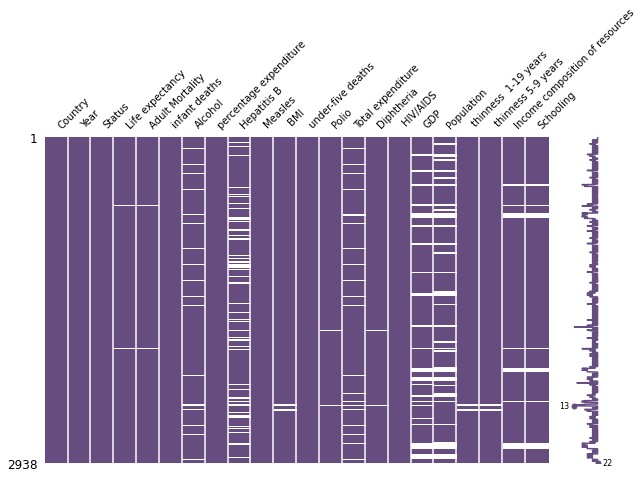

In [10]:
# show missing values and how they are distributed in the dataset 
import missingno as msno
msno.matrix(data, color=(0.4, 0.3, 0.5), figsize=(10,6),fontsize=(10))

Some observations share missing values on multiple columns but others don't.

#### Missing Values Strategy 

+ To fill in the missing data, we believe that a good strategy would be to group the data by country and fill in the missing value with the mean of that country (we have data for 16 years for each country). In this way we preserve the characteristics of each country without mixing data from countries that are very different from each other. 


+ The data is for consecutive years, so filling them in with the mean by country may be a good approximation as we understand that in general the changes in these time periods will generally not be very large. 


+ If after applying this operation there are still missing data, it means that for that particular country we do not have that data for any year, so the most correct thing to do in these cases would be to eliminate the data for that country. 


+ With this strategy, it is possible that the number of countries for the study will be significantly reduced, but the idea is that our model will contain the most realistic data possible, even if we reduce the number of countries participating in the study. 


+ In a more detailed study we could look for the missing data by searching for the information in other sources, but for the purpose of this exercise we will keep it simple. 

Firstly, we´ll check the number of observations per country: 

In [11]:
country_counts = data.Country.value_counts().rename_axis('Countries').to_frame('Counts')
country_counts

,Counts
Countries,
Afghanistan,16
Peru,16
Nicaragua,16
Niger,16
Nigeria,16
...,...
Niue,1
San Marino,1
Nauru,1


In [12]:
country_counts.Counts.unique()

array([16,  1], dtype=int64)

In [13]:
country_counts.Counts.value_counts()

16    183
1      10
Name: Counts, dtype: int64

In our dataset we note that for 183 countries we have data for 16 years but we also have 10 countries where we only have data for one year. Let's review these countries for which we only have one observation: 

In [14]:
data.groupby('Country').filter(lambda x: len(x) == 1)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,82.8,0,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,58.4,0,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,81.6,0,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,NaN,0,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,87.3,0,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,77.3,0,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,83.3,0,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,5.2,0,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,NaN,0,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,79.3,0,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In these 10 countries where we only have observations for one year we also see that we have several columns with missing values. As it would not be appropriate to fill in these data following the statistics of other countries and we do not have the country's own data, we will eliminate these observations and we will be left only with the countries that have data for 16 years. 

In [15]:
# we will only keep countries that have 16 years of data
data = data[data.groupby('Country').Country.transform(len) == 16]
# check how many countries we have now 
len(data.Country.unique())

183

In [16]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

Now let's treat missing values one by one: 

+ #### Alcohol Column

In [17]:
# check nan values for Alcohol column 
data['Alcohol'].isnull().sum()

193

We will fill nan with the mean of the value grouping for each country: 

In [18]:
data['Alcohol'] = data['Alcohol'].fillna(data.groupby('Country')['Alcohol'].transform('mean'))
data['Alcohol'].isnull().sum()

16

We still have 16 missing values after imputing nan values, let´s look at them: 

In [19]:
data[data['Alcohol'].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2409,South Sudan,2015,Developing,57.3,332.0,26,NaN,0.000000,31.0,878,NaN,39,41.0,NaN,31.0,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9
2410,South Sudan,2014,Developing,56.6,343.0,26,NaN,46.074469,NaN,441,NaN,39,44.0,2.74,39.0,3.5,1151.861715,1153971.0,NaN,NaN,0.421,4.9
2411,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,NaN,525,NaN,40,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9
2412,South Sudan,2012,Developing,56.0,347.0,26,NaN,38.338232,NaN,1952,NaN,40,64.0,2.77,59.0,3.8,958.455810,1818258.0,NaN,NaN,0.419,4.9
2413,South Sudan,2011,Developing,55.4,355.0,27,NaN,0.000000,NaN,1256,NaN,41,66.0,NaN,61.0,3.9,176.971300,1448857.0,NaN,NaN,0.429,4.9
2414,South Sudan,2010,Developing,55.0,359.0,27,NaN,0.000000,NaN,0,NaN,41,NaN,NaN,NaN,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,27,NaN,0.000000,NaN,0,NaN,42,NaN,NaN,NaN,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,27,NaN,0.000000,NaN,0,NaN,42,NaN,NaN,NaN,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0
2417,South Sudan,2007,Developing,53.1,381.0,27,NaN,0.000000,NaN,0,NaN,43,NaN,NaN,NaN,4.2,NaN,88568.0,NaN,NaN,0.000,0.0
2418,South Sudan,2006,Developing,52.5,383.0,28,NaN,0.000000,NaN,0,NaN,43,NaN,NaN,NaN,4.1,NaN,8468152.0,NaN,NaN,0.000,0.0


All observations belong to South Sudan, for which we have no data for any year, not only in the alcohol column but also in other columns, we will eliminate the observations for this country.  

In [20]:
# delete rows where country is South Sudan 
data.drop(data[(data['Country'] == 'South Sudan')].index, inplace = True) 

#### Hepatitis B column

In [21]:
data['Hepatitis B'].isnull().sum()

538

In [22]:
data['Hepatitis B'] = data['Hepatitis B'].fillna(data.groupby('Country')['Hepatitis B'].transform('mean'))
data['Hepatitis B'].isnull().sum()

144

We still have 144 missing values for hepatitis B, let's see which countries they correspond to, to do that we will create a function that allows us to access a list of countries and the number of nan vales:  

In [23]:
# create a function that let us acces countries that have nan values 

def check_nan(col): 
    
    unique_country = data['Country'].unique()
    null_count = []
    for i in unique_country: 
        result = data[data['Country'] == i ][col].isnull().sum()
        null_count.append(result)
        
    df = pd.DataFrame({'Country': unique_country,
              'Number of NaN Values': null_count})
    
    df = df[df['Number of NaN Values']!=0]
    
    return df

In [24]:
col1 = 'Hepatitis B'
check_nan(col1)

,Country,Number of NaN Values
46,Denmark,16
57,Finland,16
72,Hungary,16
73,Iceland,16
82,Japan,16
119,Norway,16
146,Slovenia,16
156,Switzerland,16
171,United Kingdom of Great Britain and Northern I...,16


In [25]:
print('We have', len(check_nan(col1)['Country']), 'countries without data for Hepatitis B.')

We have 9 countries without data for Hepatitis B.


After a Google query, we found that hepatitis B, although with a low prevalence, continues to occur in both developing and developed countries, so we will eliminate these countries for which we have no data (we do not believe it is appropriate to change the nans with zeros). 

In [26]:
# deleting rows with nan on Hepatitis B
data.drop(data[data['Hepatitis B'].isnull()].index, inplace= True)

#### BMI column

In [27]:
data[data[' BMI '].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2457,Sudan,2015,Developing,64.1,225.0,58,1.458,0.000000,93.000000,3585,NaN,85,93.0,NaN,93.0,0.3,2513.884661,3864783.0,NaN,NaN,0.488,7.2
2458,Sudan,2014,Developing,63.8,229.0,59,0.010,253.608651,94.000000,676,NaN,86,94.0,8.43,94.0,0.3,2176.898290,37737913.0,NaN,NaN,0.485,7.2
2459,Sudan,2013,Developing,63.5,232.0,60,0.010,227.835321,93.000000,2813,NaN,88,93.0,8.42,93.0,0.3,1955.667990,36849918.0,NaN,NaN,0.478,7.0
2460,Sudan,2012,Developing,63.2,235.0,61,0.010,220.522192,92.000000,8523,NaN,89,92.0,8.20,92.0,0.3,1892.894352,3599192.0,NaN,NaN,0.468,6.8
2461,Sudan,2011,Developing,62.7,241.0,61,2.120,196.689215,93.000000,5616,NaN,91,93.0,8.30,93.0,0.3,1666.857757,35167314.0,NaN,NaN,0.463,7.0
2462,Sudan,2010,Developing,62.5,243.0,62,1.770,172.009788,75.000000,680,NaN,92,9.0,7.97,9.0,0.3,1476.478870,34385963.0,NaN,NaN,0.461,7.0
2463,Sudan,2009,Developing,62.0,248.0,63,1.990,17.053693,72.000000,68,NaN,94,81.0,8.40,81.0,0.3,1226.884381,3365619.0,NaN,NaN,0.456,6.8
2464,Sudan,2008,Developing,61.8,251.0,64,2.010,128.636271,78.000000,129,NaN,95,85.0,8.17,86.0,0.3,1291.528826,32955496.0,NaN,NaN,0.444,6.3
2465,Sudan,2007,Developing,61.4,254.0,65,2.010,86.131669,78.000000,327,NaN,97,84.0,4.72,84.0,0.3,1115.695200,32282526.0,NaN,NaN,0.440,6.4
2466,Sudan,2006,Developing,61.0,26.0,66,1.900,60.336857,6.000000,228,NaN,99,77.0,3.93,78.0,0.2,893.879364,316764.0,NaN,NaN,0.430,6.2


All observations belong to Sudan, which also has two other columns with only nan values, we will remove the observations from this country. 

In [28]:
# we dont have info about BMI, thinness 1-19 years or thinness 5-9 years for this country 
data.drop(data[(data['Country'] == 'Sudan')].index, inplace = True) 

#### Total Expenditure Column

In [29]:
data['Total expenditure'].isnull().sum()

203

In [30]:
# fill nan with the mean grouped by countries
data['Total expenditure'] = data['Total expenditure'].fillna(data.groupby('Country')['Total expenditure'].transform('mean'))
data['Total expenditure'].isnull().sum()

32

Let's check the countries that don't have any value for 'Total expenditure': 

In [31]:
col2 = 'Total expenditure'
check_nan('Total expenditure')

,Country,Number of NaN Values
44,Democratic People's Republic of Korea,16
141,Somalia,16


In [32]:
print('We have', len(check_nan(col2)['Country']), 'countries without any data for Total expenditure.')

We have 2 countries without any data for Total expenditure.


We don't have values for Korea or Somalia, we will delete these 2 countries: 

In [33]:
# we dont have data for Somalia or Korea, we will delete these countries
# deleting rows with nan on Total expenditure
data.drop(data[data['Total expenditure'].isnull()].index, inplace= True)

data.isnull().sum()

#### GDP Column

In [34]:
# null values for GDP column
data['GDP'].isnull().sum()

390

In [35]:
data['GDP'] = data['GDP'].fillna(data.groupby('Country')['GDP'].transform('mean'))
data['GDP'].isnull().sum()

368

Check these countries: 

In [36]:
col3 = 'GDP'
check_nan(col3)

,Country,Number of NaN Values
10,Bahamas,16
19,Bolivia (Plurinational State of),16
27,Côte d'Ivoire,16
38,Congo,16
43,Czechia,16
44,Democratic Republic of the Congo,16
48,Egypt,16
57,Gambia,16
71,Iran (Islamic Republic of),16
82,Kyrgyzstan,16


In [37]:
print('We have', len(check_nan(col3)['Country']), 'countries without any data for GDP.')

We have 23 countries without any data for GDP.


Since GDP is such an important economic metric, it is possible that we can find this data through other sources, but to keep the exercise simple we will eliminate these countries. 

In [38]:
# deleting rows with nan on GDP
data.drop(data[data['GDP'].isnull()].index, inplace= True)

#### Population Column

In [39]:
data['Population'].isnull().sum()

228

In [40]:
# fill nan with mean according to each country 
data['Population'] = data['Population'].fillna(data.groupby('Country')['Population'].transform('mean'))
data['Population'].isnull().sum()

224

In [41]:
# check countries with no values for population: 
col4= 'Population'
check_nan(col4)

,Country,Number of NaN Values
4,Antigua and Barbuda,16
10,Bahrain,16
12,Barbados,16
21,Brunei Darussalam,16
37,Cuba,16
54,Grenada,16
72,Kuwait,16
77,Libya,16
97,New Zealand,16
101,Oman,16


In [42]:
print('We have', len(check_nan(col4)['Country']), 'countries without data for Population.')

We have 14 countries without data for Population.


In [43]:
# delete this countries with no data on population
data.drop(data[data['Population'].isnull()].index, inplace= True)

#### Polio Column 

In [44]:
data['Polio'].isnull().sum()

8

We have 8 observations with nan values on this column, let´s fill them with the mean for their respective country: 

In [45]:
data['Polio'] = data['Polio'].fillna(data.groupby('Country')['Polio'].transform('mean'))
data['Polio'].isnull().sum()

0

Now we don't have any missing values for Polio column. 

#### Diphteria Column

In [46]:
data['Diphtheria '].isnull().sum()

8

Again we will fill this observations with the mean for their respective country: 

In [47]:
data['Diphtheria '] = data['Diphtheria '].fillna(data.groupby('Country')['Diphtheria '].transform('mean'))
data['Diphtheria '].isnull().sum()

0

We don't have null values in this column anymore. 

In [48]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

Now we don't have any nan values in our dataset. 

#### Exploratory Analysis

In [49]:
data.shape

(2128, 22)

In [50]:
print('We have observations for', len(data.Country.unique()), 'different countries.')

We have observations for 133 different countries.


After cleaning the data, our study about Life Expectancy will center around **133 countries.**

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2128 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2128 non-null   object 
 1   Year                             2128 non-null   int64  
 2   Status                           2128 non-null   object 
 3   Life expectancy                  2128 non-null   float64
 4   Adult Mortality                  2128 non-null   float64
 5   infant deaths                    2128 non-null   int64  
 6   Alcohol                          2128 non-null   float64
 7   percentage expenditure           2128 non-null   float64
 8   Hepatitis B                      2128 non-null   float64
 9   Measles                          2128 non-null   int64  
 10   BMI                             2128 non-null   float64
 11  under-five deaths                2128 non-null   int64  
 12  Polio               

In [52]:
# summary statistics 
data.describe().round(2)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2128.00,2128.00,2128.00,2128.00,2128.00,2128.00,2128.00,2128.00,2128.00,2128.00,2128.00,2128.00,2128.00,2128.00,2128.00,2.128000e+03,2128.00,2128.00,2128.00,2128.00
mean,2007.50,68.14,174.30,35.90,4.44,640.07,77.27,2657.47,36.69,49.82,80.57,5.89,80.70,2.17,5408.64,1.340066e+07,5.11,5.18,0.61,11.69
std,4.61,9.61,129.76,136.22,3.96,1710.80,25.26,11912.24,19.84,185.15,24.17,2.26,24.17,5.83,11374.23,6.315714e+07,4.71,4.81,0.20,3.20
min,2000.00,36.30,1.00,0.00,0.01,0.00,2.00,0.00,1.40,0.00,3.00,0.37,2.00,0.10,1.68,3.400000e+01,0.10,0.10,0.00,0.00
25%,2003.75,62.00,76.00,1.00,0.83,19.88,68.00,0.00,18.40,1.00,75.00,4.37,76.00,0.10,395.91,1.989615e+05,1.60,1.60,0.48,9.80
50%,2007.50,69.95,152.00,4.00,3.74,83.68,87.00,20.00,38.85,4.00,91.00,5.80,91.00,0.10,1351.18,1.433672e+06,3.40,3.40,0.65,11.90
75%,2011.25,74.80,241.25,24.00,7.16,431.37,95.00,459.25,55.20,34.25,96.00,7.33,96.00,1.30,4494.29,7.785482e+06,7.52,7.60,0.75,13.80
max,2015.00,89.00,723.00,1800.00,17.87,18961.35,99.00,212183.00,77.60,2500.00,99.00,14.39,99.00,50.60,119172.74,1.293859e+09,27.70,28.60,0.94,20.70


We notice that the dataset is composed of features that seem to have in general many outliers, we see that we have very high standard deviations and maximum values compared to the mean in many of our features. 

Let´s see this graphically, first we will look for the distribution on the numeric columns: 

In [53]:
plot_cols = ['Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

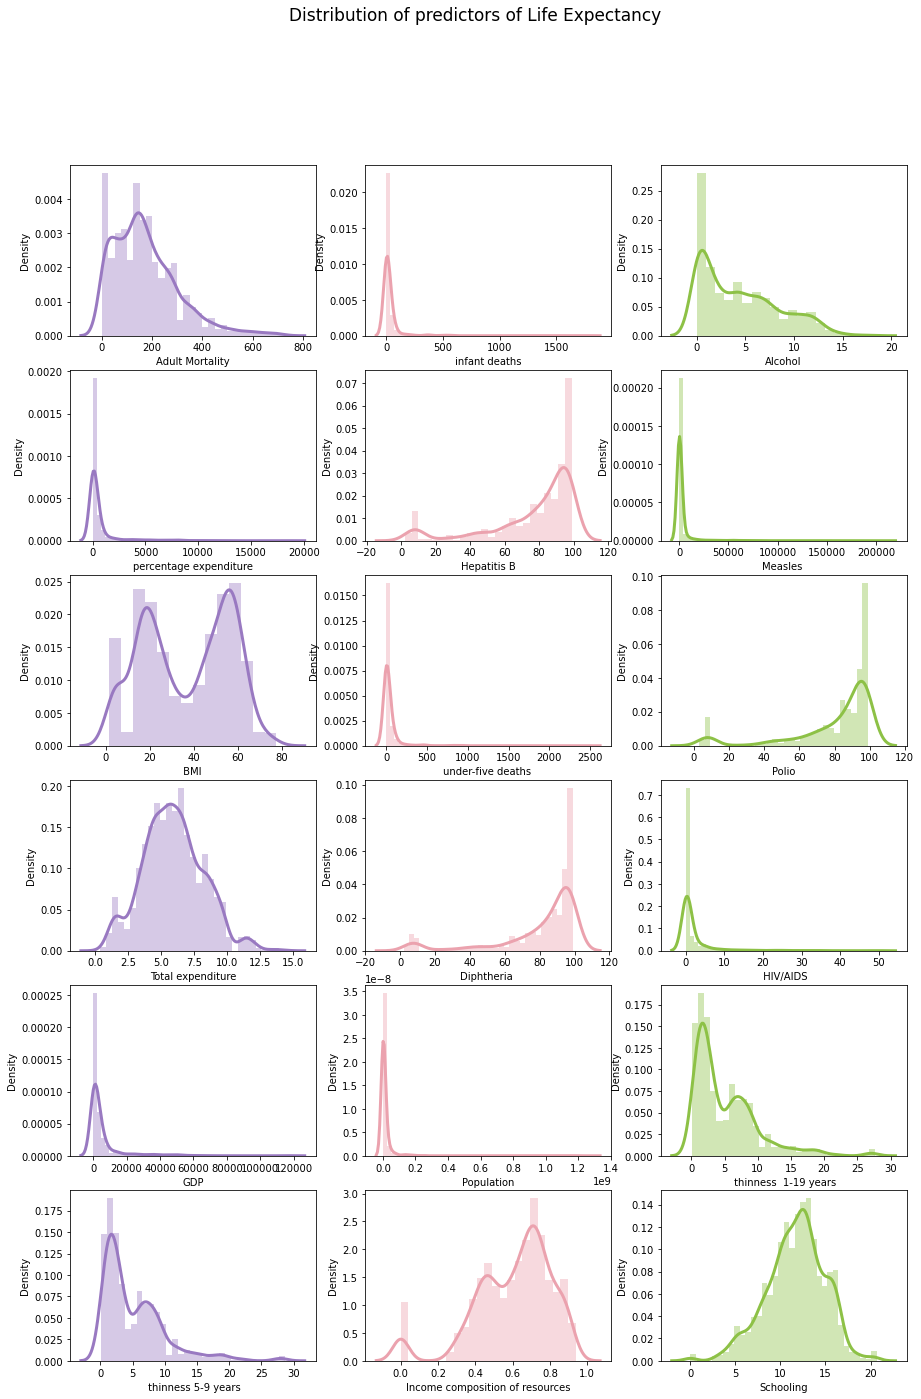

In [91]:
colors =["#9979c1", "#eba2ae", "#8dc146"]

f, axes = plt.subplots(6,3, figsize = (15, 22))
f.suptitle('Distribution of predictors of Life Expectancy', fontsize = 17 )

for i, ax in enumerate(axes.flatten()): 
    sns.distplot(data[plot_cols].iloc[: , i], color = colors[i%3], ax = ax, kde_kws=dict(linewidth=3)); 

We see that most of the distributions do not look normal, some even appear to be multimodal, probably due to the differences between developing and developed countries. 

In [55]:
data.Status.value_counts(normalize= True)

Developing    0.857143
Developed     0.142857
Name: Status, dtype: float64

The dataset is composed of 85% of developing countries and 15% of developed countries. 

Now let´s chech the distribution of our target: Life Expectancy. 

<AxesSubplot:xlabel='Life expectancy ', ylabel='Density'>

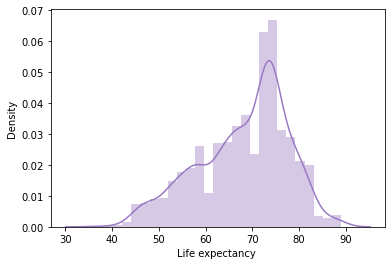

In [56]:
# distribution of the target 
sns.distplot(data['Life expectancy '], color= "#9979c1")

This features has a left skewed distribution with outliers in low values. 

We can draw boxplots of these features separating observations by developed and developing countries: 

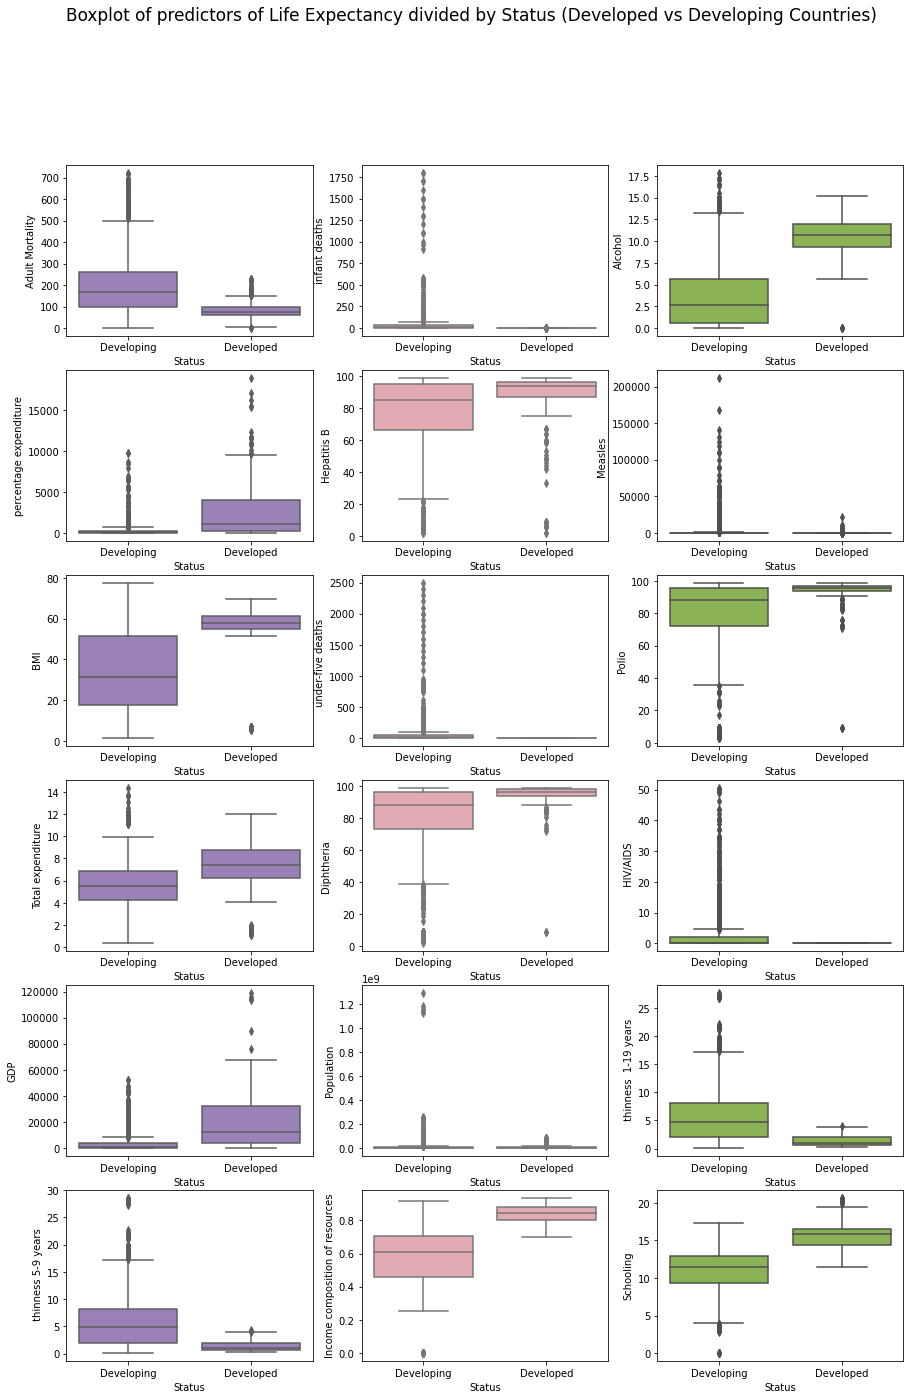

In [92]:
colors =["#9979c1", "#eba2ae", "#8dc146"]

f, axes = plt.subplots(6,3, figsize = (15, 22))
f.suptitle('Boxplot of predictors of Life Expectancy divided by Status (Developed vs Developing Countries)', fontsize = 17 )

for i, ax in enumerate(axes.flatten()): 
    sns.boxplot(y = data[plot_cols].iloc[: , i], color = colors[i%3], ax = ax, x = data['Status']); 


Clearly there are many differences between developed and developing countries, with outliers being much more significant in the latter group. Let´s check our target: 

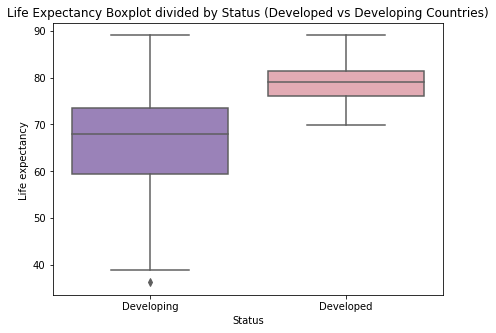

In [58]:
plt.figure(figsize = (7,5))

sns.boxplot(x= data['Status'], y = data['Life expectancy '], palette = ["#9979c1", "#eba2ae"])
plt.title('Life Expectancy Boxplot divided by Status (Developed vs Developing Countries)'); 

The values are much higher for developed countries and lower and more spread for developing countries. 

Before creating our model we will change the order of the columns: 

In [59]:
#change order of the columns 
cols = ['Life expectancy ','Country', 'Year', 'Status', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']
data = data[cols]

In [60]:
data.head()

,Life expectancy,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#### Preparing our model 

Foer our model we will scale all numerical features using RobustScaler to handle outliers, but I think it may be a good idea to treat year as a categorical feature rather than apply a scaler since it doesn't have a continuous value, so we will convert this column to string.  

In [61]:
data['Year'] = data['Year'].astype('str')

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2128 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  2128 non-null   float64
 1   Country                          2128 non-null   object 
 2   Year                             2128 non-null   object 
 3   Status                           2128 non-null   object 
 4   Adult Mortality                  2128 non-null   float64
 5   infant deaths                    2128 non-null   int64  
 6   Alcohol                          2128 non-null   float64
 7   percentage expenditure           2128 non-null   float64
 8   Hepatitis B                      2128 non-null   float64
 9   Measles                          2128 non-null   int64  
 10   BMI                             2128 non-null   float64
 11  under-five deaths                2128 non-null   int64  
 12  Polio               

Now we will separate target from predictors and split our datasert between train and test: 

In [63]:
# Separate target from predictors
y = data['Life expectancy ']
X = data.drop(['Life expectancy '], axis = 1)

In [64]:
from sklearn.model_selection import train_test_split

# divide into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 24)

Before applying the model, we differenciate between numerical and categorical columns: 

In [65]:
# select categorical columns 
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == 'object']

In [66]:
# select numerical columns 
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

#### Apply a Pipeline

Inside the pipeline, we will apply: 

+ One Hot Encoder: For categorical columns 
+ RobustScaler : For numerical columns (we have already checked for the presence of outliers in the numerical features)


In [67]:
# import libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

In [68]:
# Define Preprocessing Steps
# for categorical features we will use OneHotEncoder
categorical_transformer = OneHotEncoder()

# we will use RobustScaler() for numerical cols
numerical_transformer = RobustScaler()

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
                transformers = [
                    ('num', numerical_transformer, numerical_cols), 
                    #('num2', numerical_transformer2, numerical_cols), 
                    ('cat', categorical_transformer, categorical_cols), 
                ])

In [69]:
# define the model 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state= 24)

In [70]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Bundle preprocessing and modeling code in a pipeline
pipeline = Pipeline(steps = [('preprocessor', preprocessor), 
                             ('model', model)])

# Preprocessing of training data, fit model 
pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
predictions = pipeline.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

# show results 
print('R2 : ', r2)
print('MSE: ', mse)

R2 :  0.9688831438019203
MSE:  2.909140640062597


We have a pretty good result, 0.9688 R2 and 2.91 of MSE. Now let´s check if we can improve our model. We will try two different ways: 

+ GridSearch
+ RandomSearch

#### GridSearh on our model

In [71]:
# cheking original parameters
pipeline['model'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 24,
 'verbose': 0,
 'warm_start': False}

In [72]:
from sklearn.model_selection import GridSearchCV

parameters = {'model__n_estimators': [10, 50, 100, 150], 'model__max_depth': [1, 10, 30], 
              'model__min_samples_leaf': [0.2, .5, 1] }

grid = GridSearchCV(pipeline, param_grid=parameters, cv=5, scoring = 'r2')

We will fit our GridSearch parameters on the train set and check the results on test set.

In [73]:
# apply to train set 
grid.fit(X_train, y_train)

# print results based on test set 
print("score = %3.5f" %(grid.score(X_test,y_test)))
print(grid.best_params_) 

score = 0.96925
{'model__max_depth': 30, 'model__min_samples_leaf': 1, 'model__n_estimators': 150}


With these parameters we get a result of 0.96925 on test set, it is a little improvement compared to our original model (0.9688 R2). 

#### RandomSearch on our model

With random search, instead of defining the values for the parameters, we look for a range of values for the best value. 

In [74]:
from sklearn.model_selection import RandomizedSearchCV

# first we definde the parameters grid
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]


# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

random_param = {'model__n_estimators': n_estimators, 'model__max_depth': max_depth,
                'model__min_samples_leaf': min_samples_leaf }

random_grid = RandomizedSearchCV(pipeline, param_distributions= random_param, cv = 5, scoring= 'r2')

In [75]:
# apply to train set 
random_grid.fit(X_train, y_train)

# print results based on test set 
print("score = %3.5f" %(random_grid.score(X_test,y_test)))
print(random_grid.best_params_) 

score = 0.96904
{'model__n_estimators': 700, 'model__min_samples_leaf': 1, 'model__max_depth': 32}


In this case, selecting the parameters with RandomSearch gives a slightly better result on test set (0.96938) for R2 than GridSearch (0.96925). 

### - Exercici 2

Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules

For this exercice I am taking an excerpt from the book 'The Little Prince'. 

In [1]:
# importing libraries 
import nltk
from nltk.tokenize import word_tokenize

In [2]:
text = """
All men have stars, but they are not the same things for different people. For some, who are travelers,
the stars are guides. For others they are no more than little lights in the sky. For others, who are scholars,
they are problems... But all these stars are silent. You-You alone will have stars as no one else has them... 
In one of the stars I shall be living. In one of them I shall be laughing. And so it will be as if all the stars will
be laughing when you look at the sky at night..You, only you, will have stars that can laugh! And when your sorrow is 
comforted (time soothes all sorrows) you will be content that you have known me... You will always be my friend. You will
want to laugh with me. And you will sometimes open your window, so, for that pleasure... It will be as if, in place of the
stars, I had given you a great number of little bells that knew how to laugh.
"""

First we will break text paragraph into words.

In [3]:
tokenized_word = word_tokenize(text)

print(tokenized_word)

['All', 'men', 'have', 'stars', ',', 'but', 'they', 'are', 'not', 'the', 'same', 'things', 'for', 'different', 'people', '.', 'For', 'some', ',', 'who', 'are', 'travelers', ',', 'the', 'stars', 'are', 'guides', '.', 'For', 'others', 'they', 'are', 'no', 'more', 'than', 'little', 'lights', 'in', 'the', 'sky', '.', 'For', 'others', ',', 'who', 'are', 'scholars', ',', 'they', 'are', 'problems', '...', 'But', 'all', 'these', 'stars', 'are', 'silent', '.', 'You-You', 'alone', 'will', 'have', 'stars', 'as', 'no', 'one', 'else', 'has', 'them', '...', 'In', 'one', 'of', 'the', 'stars', 'I', 'shall', 'be', 'living', '.', 'In', 'one', 'of', 'them', 'I', 'shall', 'be', 'laughing', '.', 'And', 'so', 'it', 'will', 'be', 'as', 'if', 'all', 'the', 'stars', 'will', 'be', 'laughing', 'when', 'you', 'look', 'at', 'the', 'sky', 'at', 'night', '..', 'You', ',', 'only', 'you', ',', 'will', 'have', 'stars', 'that', 'can', 'laugh', '!', 'And', 'when', 'your', 'sorrow', 'is', 'comforted', '(', 'time', 'soothe

We see this text contains a lot of punctuation marks, we will remove the punctuation marks to keep only the words: 

In [4]:
only_words_tokenized = [word for word in tokenized_word if word.isalpha()]
print(only_words_tokenized)

['All', 'men', 'have', 'stars', 'but', 'they', 'are', 'not', 'the', 'same', 'things', 'for', 'different', 'people', 'For', 'some', 'who', 'are', 'travelers', 'the', 'stars', 'are', 'guides', 'For', 'others', 'they', 'are', 'no', 'more', 'than', 'little', 'lights', 'in', 'the', 'sky', 'For', 'others', 'who', 'are', 'scholars', 'they', 'are', 'problems', 'But', 'all', 'these', 'stars', 'are', 'silent', 'alone', 'will', 'have', 'stars', 'as', 'no', 'one', 'else', 'has', 'them', 'In', 'one', 'of', 'the', 'stars', 'I', 'shall', 'be', 'living', 'In', 'one', 'of', 'them', 'I', 'shall', 'be', 'laughing', 'And', 'so', 'it', 'will', 'be', 'as', 'if', 'all', 'the', 'stars', 'will', 'be', 'laughing', 'when', 'you', 'look', 'at', 'the', 'sky', 'at', 'night', 'You', 'only', 'you', 'will', 'have', 'stars', 'that', 'can', 'laugh', 'And', 'when', 'your', 'sorrow', 'is', 'comforted', 'time', 'soothes', 'all', 'sorrows', 'you', 'will', 'be', 'content', 'that', 'you', 'have', 'known', 'me', 'You', 'will',

#### Frequency Distribution

In [5]:
from nltk.probability import FreqDist

fdist = FreqDist(only_words_tokenized)
print(fdist)

<FreqDist with 91 samples and 174 outcomes>


The text has 91 different words and the lenght is 174. 

In [6]:
# show the top 10 most common words 
fdist.most_common(10)

[('will', 9),
 ('stars', 8),
 ('are', 7),
 ('the', 7),
 ('be', 7),
 ('you', 6),
 ('have', 4),
 ('of', 4),
 ('that', 4),
 ('they', 3)]

In [7]:
# show the same but in another format 
fdist.tabulate(10)

 will stars   are   the    be   you  have    of  that  they 
    9     8     7     7     7     6     4     4     4     3 


We can also do a plot with the 30 most common words: 

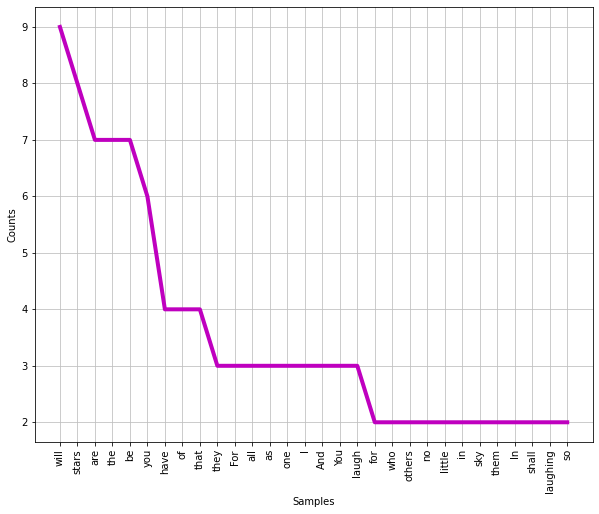

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
fdist.plot(30,cumulative=False, color = 'm', linewidth = 4)
plt.show()

### Nivell 2

#### - Exercici 1

Treu les stopwords i realitza stemming al teu conjunt de dades.

In [9]:
# let´s look at stopwords in English
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
print(stop_words)

{'hadn', "won't", 'some', "you'd", 'yourself', 'here', "wouldn't", 'other', 'ours', 'again', 'both', 'as', 'than', 'ma', 'she', 'too', 'so', "that'll", 'of', "hadn't", 'we', 'in', 'where', "isn't", 'mustn', "didn't", "shan't", 'needn', 'isn', 'about', 't', "she's", 'below', 'did', 'am', 'now', 'with', "shouldn't", "weren't", "you'll", 'to', 've', 'o', 'doesn', 'does', 'haven', 'them', 'up', 'didn', 're', 'by', 'hasn', 'you', 'herself', 'once', "you've", 'having', 'few', 'when', 'for', 'your', 'wouldn', 'myself', 'while', 'against', 'do', 'over', 'being', 'its', 'the', 'mightn', 'he', "haven't", 'y', 'hers', 'is', 'been', 'at', 'shan', 'then', 'weren', 'and', 'off', "needn't", "doesn't", 'was', 'which', 'this', 'theirs', "couldn't", 'very', "mustn't", 'after', 'through', 'or', 'should', 'those', 'will', 'nor', 'these', 'itself', 'can', 'ourselves', 'what', 'i', 'ain', 'be', "it's", 'how', 'yours', 'an', 'himself', 'couldn', 'were', 'same', "you're", "mightn't", 'there', 'had', 'it', 'ar

Now we will remove these words from our text, either in uppercase and in lowercase: 

In [10]:
# we are removing all stop words either in uppercase and in lowercase 
filtered_text = [w for w in only_words_tokenized if w.lower() not in stop_words]
print(filtered_text)

['men', 'stars', 'things', 'different', 'people', 'travelers', 'stars', 'guides', 'others', 'little', 'lights', 'sky', 'others', 'scholars', 'problems', 'stars', 'silent', 'alone', 'stars', 'one', 'else', 'one', 'stars', 'shall', 'living', 'one', 'shall', 'laughing', 'stars', 'laughing', 'look', 'sky', 'night', 'stars', 'laugh', 'sorrow', 'comforted', 'time', 'soothes', 'sorrows', 'content', 'known', 'always', 'friend', 'want', 'laugh', 'sometimes', 'open', 'window', 'pleasure', 'place', 'stars', 'given', 'great', 'number', 'little', 'bells', 'knew', 'laugh']


In [11]:
len(filtered_text)

59

Now we have 59 words.

#### Stemming

Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes.

In [15]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

stemmed_words = []

for word in filtered_text: 
    stemmed_words.append(ps.stem(word))
    

print("Filtered Text:",filtered_text)
print("______________________________________________________________________________________________________________________________")
print(" ")
print("Stemmed Text:",stemmed_words)


Filtered Text: ['men', 'stars', 'things', 'different', 'people', 'travelers', 'stars', 'guides', 'others', 'little', 'lights', 'sky', 'others', 'scholars', 'problems', 'stars', 'silent', 'alone', 'stars', 'one', 'else', 'one', 'stars', 'shall', 'living', 'one', 'shall', 'laughing', 'stars', 'laughing', 'look', 'sky', 'night', 'stars', 'laugh', 'sorrow', 'comforted', 'time', 'soothes', 'sorrows', 'content', 'known', 'always', 'friend', 'want', 'laugh', 'sometimes', 'open', 'window', 'pleasure', 'place', 'stars', 'given', 'great', 'number', 'little', 'bells', 'knew', 'laugh']
______________________________________________________________________________________________________________________________
 
Stemmed Text: ['men', 'star', 'thing', 'differ', 'peopl', 'travel', 'star', 'guid', 'other', 'littl', 'light', 'sky', 'other', 'scholar', 'problem', 'star', 'silent', 'alon', 'star', 'one', 'els', 'one', 'star', 'shall', 'live', 'one', 'shall', 'laugh', 'star', 'laugh', 'look', 'sky', 'nig

We print the text without stopwords next to stemmed text to appreciate the differences in the words. 

### Nivell 3

### - Exercici 1

Realitza sentiment analysis al teu conjunt de dades.

We can do Sentiment Analysis for the whole text: 

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# we use the original text
sentiment = SentimentIntensityAnalyzer()
sentiment.polarity_scores(text)

{'neg': 0.061, 'neu': 0.747, 'pos': 0.192, 'compound': 0.9841}

This returns a dictionary with the percentages of negative, neutral and positive words, and the final result, the compund 0.9841, tells us the analysis is positive. 

"The compound score is the sum of positive, negative & neutral scores which is then normalized between -1(most extreme negative) and +1 (most extreme positive).The more Compound score closer to +1, the higher the positivity of the text." Source: https://analyticsindiamag.com/sentiment-analysis-made-easy-using-vader/

In [13]:
sent_dict = sentiment.polarity_scores(text)

In [14]:
def sent_score(): 
    
    if sent_dict['compound'] >= 0.05 :
        return 'Positive'
    elif sent_dict['compound'] <= - 0.05 :
        return 'Negative'
    else :
        return 'Neutral'

result = sent_score()

print("Overall text is : ", sent_dict)
print("Text was rated as ", sent_dict['neg']*100, "% Negative")
print("Text was rated as ", sent_dict['neu']*100, "% Neutral")
print("Text was rated as ", sent_dict['pos']*100, "% Positive")

print("The overall text was rated as",result, "with a score of", sent_dict['compound'], ".")


Overall text is :  {'neg': 0.061, 'neu': 0.747, 'pos': 0.192, 'compound': 0.9841}
Text was rated as  6.1 % Negative
Text was rated as  74.7 % Neutral
Text was rated as  19.2 % Positive
The overall text was rated as Positive with a score of 0.9841 .


#### Sentiment Analysis on individual sentences of the text: 

We can also analyze the sentences individually in the text: 

In [19]:
# first we split the text into sentences 
sentences = nltk.sent_tokenize(text)
sentences

['\nAll men have stars, but they are not the same things for different people.',
 'For some, who are travelers,\nthe stars are guides.',
 'For others they are no more than little lights in the sky.',
 'For others, who are scholars,\nthey are problems...',
 'But all these stars are silent.',
 'You-You alone will have stars as no one else has them...',
 'In one of the stars I shall be living.',
 'In one of them I shall be laughing.',
 'And so it will be as if all the stars will\nbe laughing when you look at the sky at night..You, only you, will have stars that can laugh!',
 'And when your sorrow is \ncomforted (time soothes all sorrows) you will be content that you have known me... You will always be my friend.',
 'You will\nwant to laugh with me.',
 'And you will sometimes open your window, so, for that pleasure...',
 'It will be as if, in place of the\nstars, I had given you a great number of little bells that knew how to laugh.']

In [40]:
# we apply Sentiment analysis individually on each sentence of the text 
for sentence in sentences: 
    sentiment = SentimentIntensityAnalyzer()
    print(sentence)
    print('')
    scores = sentiment.polarity_scores(sentence)
    for i in sorted (scores): 
        print('{0}: {1}, '.format(i, scores[i]), end='\n')
    print('')
    print('------------------------------------------------------------------------------')
    print('\n')


All men have stars, but they are not the same things for different people.

compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 

------------------------------------------------------------------------------


For some, who are travelers,
the stars are guides.

compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 

------------------------------------------------------------------------------


For others they are no more than little lights in the sky.

compound: -0.296, 
neg: 0.167, 
neu: 0.833, 
pos: 0.0, 

------------------------------------------------------------------------------


For others, who are scholars,
they are problems...

compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 

------------------------------------------------------------------------------


But all these stars are silent.

compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 

------------------------------------------------------------------------------


You-You alone will have stars as no one else has them...

compou